In [ ]:
pip install pydub

In [ ]:
from pydub.utils import mediainfo
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
filename = "/content/drive/MyDrive/AISR_assignments/audio_sample.mp4"
audio_sample = mediainfo(filename)
sample_rate = int(audio_sample['sample_rate'])
y, sr = librosa.load(filename, sr=sample_rate)
duration = librosa.get_duration(y=y, sr=sr)
print(f"Sample rate of the audio file: {sample_rate} Hz")
print(f"The duration of the audio file is {duration:.2f} seconds.")

<ipython-input-3-cd69362d3990>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filename, sr=sample_rate)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Sample rate of the audio file: 48000 Hz
The duration of the audio file is 3.75 seconds.


<ipython-input-58-a0a1a42f09f1>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filename, sr=sample_rate)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


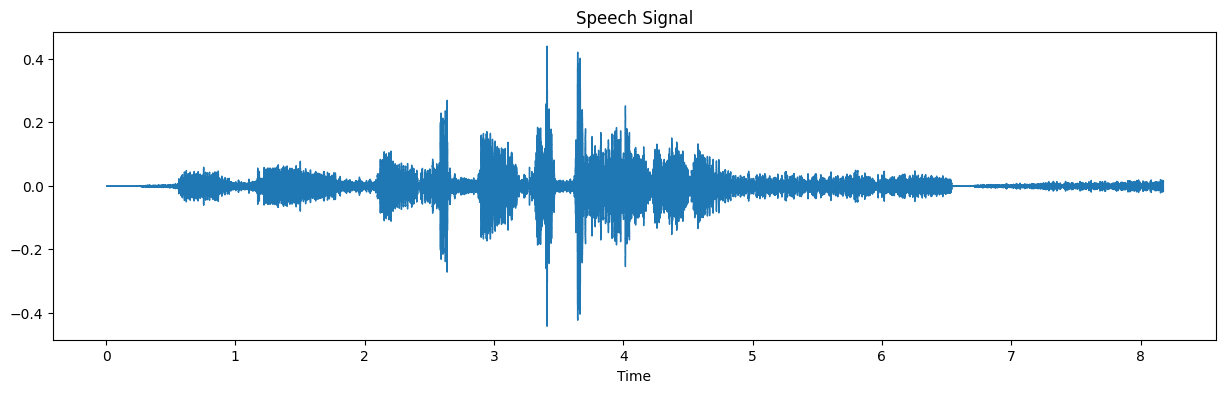

In [58]:
from IPython.display import Audio
y, sr = librosa.load(filename, sr=sample_rate)
plt.figure(figsize=(15, 4))
plt.title('Speech Signal')
librosa.display.waveshow(y)
audio_player = Audio(y, rate=sr)
audio_player

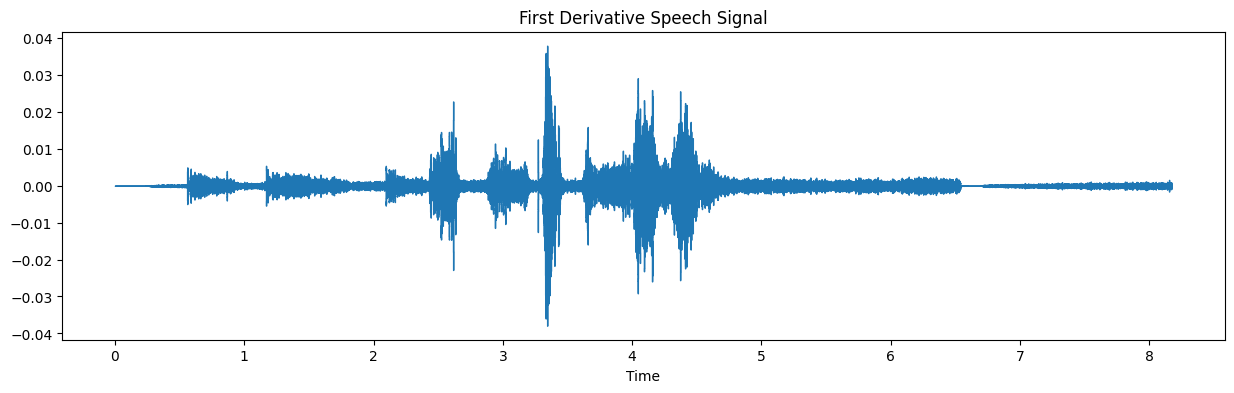

In [59]:
derivative = librosa.feature.delta(y)
plt.figure(figsize=(15, 4))
plt.title('First Derivative Speech Signal')
librosa.display.waveshow(derivative)
audio_player = Audio(derivative, rate=sr)
audio_player

In [60]:
zero_crossings = np.where(np.diff(np.sign(derivative)))[0]

In [61]:
def average_length(zero_crossings, signal_length):
    if len(zero_crossings) < 2:
        return np.nan
    else:
        return np.mean(np.diff(zero_crossings)) / signal_length

avg_length_speech = average_length(zero_crossings, len(derivative))
print("Average length between consecutive zero crossings in speech regions:", avg_length_speech)

Average length between consecutive zero crossings in speech regions: 6.0121087088733864e-05


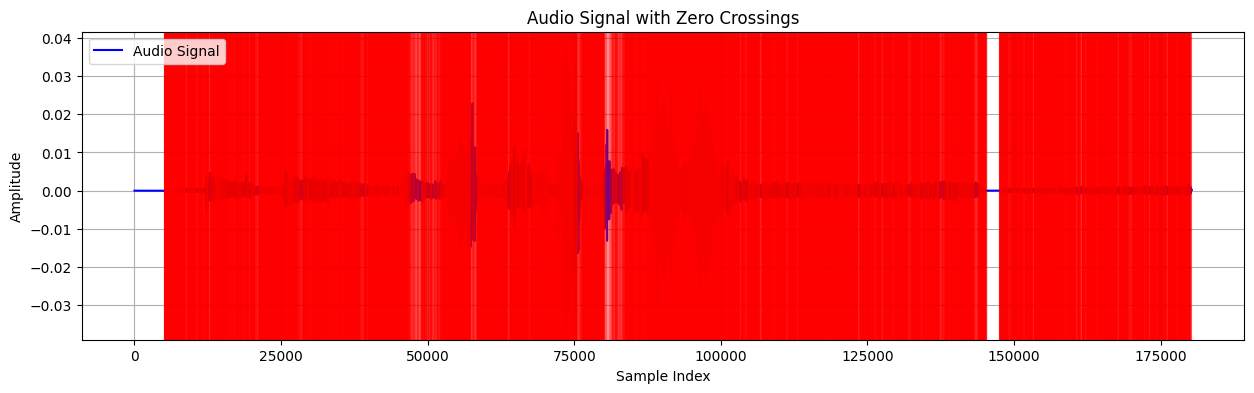

In [64]:

plt.figure(figsize=(15, 4))
plt.plot(derivative, color='b', label='Audio Signal')

for crossing in zero_crossings:
    plt.axvline(x=crossing, color='r', linestyle='-', alpha=0.1)

plt.title('Audio Signal with Zero Crossings')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
import numpy as np

derivative = np.sign(derivative)

zero_crossings_indices = np.where(np.diff(derivative))[0]

print("Indices of zero crossings:", zero_crossings_indices)

Indices of zero crossings: [  5182   5188   5194 ... 180187 180201 180204]


In [83]:

speech_regions_lengths = []
silence_regions_lengths = []
prev_zero_crossing_index = 0

for zero_crossing_index in zero_crossings_indices:
    length = zero_crossing_index - prev_zero_crossing_index
    if length < 0.5:
        silence_regions_lengths.append(length)
    else:
        speech_regions_lengths.append(length)
    prev_zero_crossing_index = zero_crossing_index

avg_speech_length = np.mean(speech_regions_lengths)
avg_silence_length = np.mean(silence_regions_lengths)


print("Average length between consecutive zero crossings in speech regions:", avg_speech_length)
print("Average length between consecutive zero crossings in silence regions:", avg_silence_length)

if avg_speech_length < avg_silence_length:
    print("Speech regions have shorter average length between zero crossings compared to silence regions.")
elif avg_speech_length > avg_silence_length:
    print("Silence regions have shorter average length between zero crossings compared to speech regions.")
else:
    print("No clear pattern observed.")


Average length between consecutive zero crossings in speech regions: 11.15537947257645
Average length between consecutive zero crossings in silence regions: nan
No clear pattern observed.


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<ipython-input-70-698705240dc8>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)


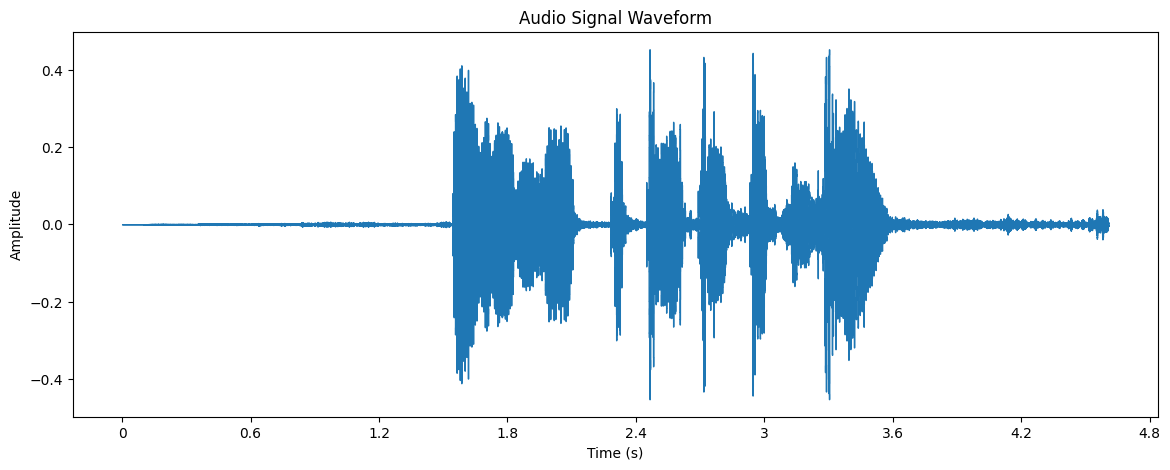

In [70]:
audio_file = "/content/speech 5 word.mp4"
y, sr = librosa.load(audio_file)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Audio Signal Waveform")
plt.show()


<ipython-input-72-27c4ad20c746>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


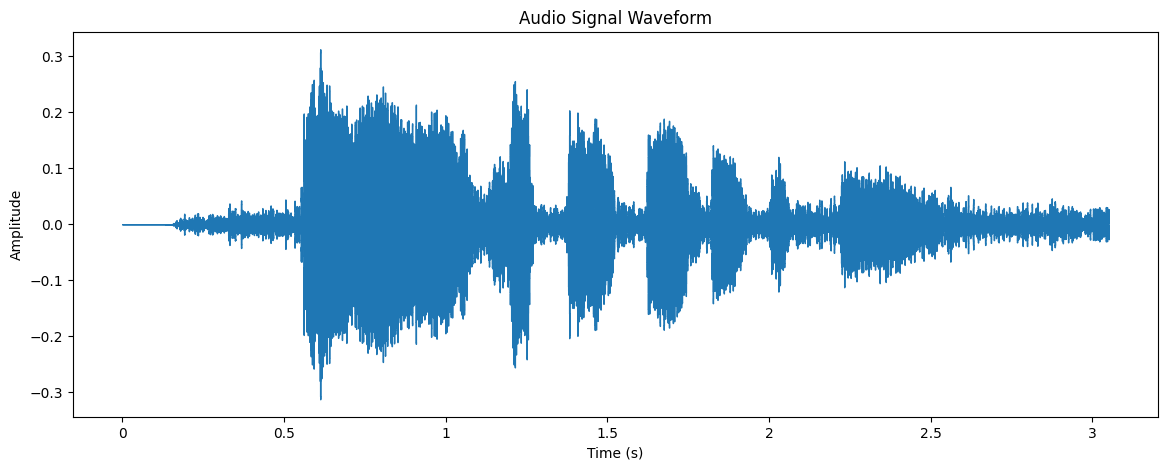

In [72]:
audio_file = "/content/srinidhi 5 word sample.mp4"
y, sr = librosa.load(audio_file)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Audio Signal Waveform")
plt.show()


In [74]:
def get_audio_length(audio_file):

    y, sr = librosa.load(audio_file, sr=None)
    length_samples = len(y)
    duration_seconds = librosa.get_duration(y=y, sr=sr)
    return length_samples, duration_seconds


audio_file_1 = '/content/speech 5 word.mp4'
audio_file_2 = "/content/srinidhi 5 word sample.mp4"


length_samples_1, duration_seconds_1 = get_audio_length(audio_file_1)
length_samples_2, duration_seconds_2 = get_audio_length(audio_file_2)


print("Length of audio file 1:")
print("  Samples:", length_samples_1)
print("  Duration (seconds):", duration_seconds_1)

print("Length of audio file 2:")
print("  Samples:", length_samples_2)
print("  Duration (seconds):", duration_seconds_2)


if length_samples_1 == length_samples_2:
    print("Both audio files have the same length in samples.")
else:
    print("Audio files have different lengths in samples.")

if duration_seconds_1 == duration_seconds_2:
    print("Both audio files have the same duration in seconds.")
else:
    print("Audio files have different durations in seconds.")

<ipython-input-74-f4d883a082c7>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-74-f4d883a082c7>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Length of audio file 1:
  Samples: 221184
  Duration (seconds): 4.608
Length of audio file 2:
  Samples: 146432
  Duration (seconds): 3.050666666666667
Audio files have different lengths in samples.
Audio files have different durations in seconds.


<ipython-input-75-72730edc95ad>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Statement


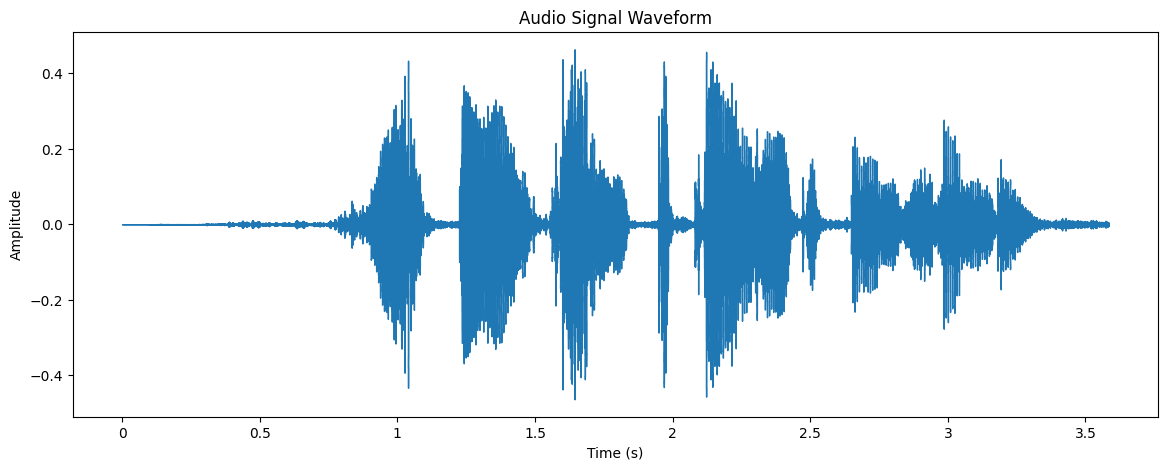

In [75]:
audio_file = "/content/speech 3 sentence.mp4"
y, sr = librosa.load(audio_file)

print("Statement")
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Audio Signal Waveform")
plt.show()

<ipython-input-76-84955b8f5873>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Question


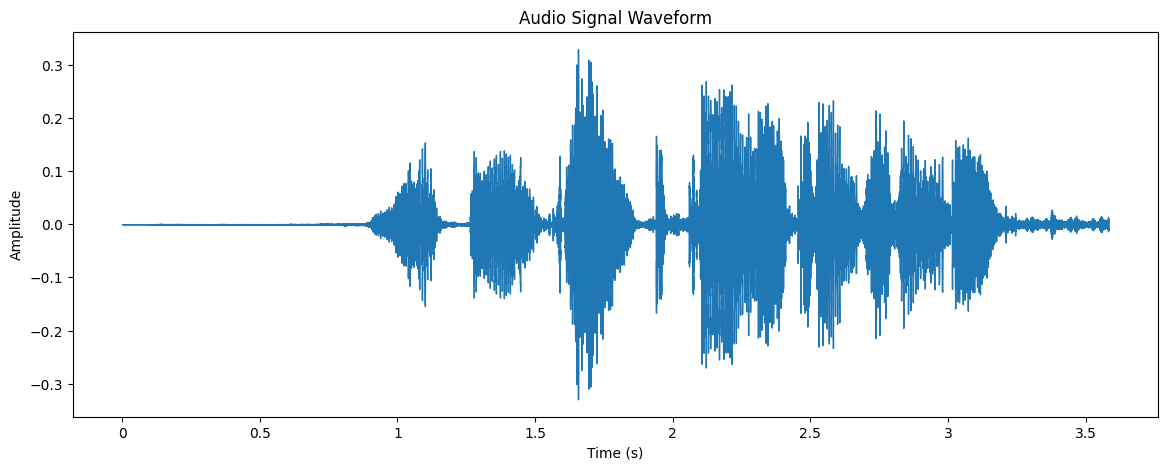

In [76]:
audio_file = "/content/speech 3 question.mp4"
y, sr = librosa.load(audio_file)

print("Question")
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Audio Signal Waveform")
plt.show()